# Spotify Songs Clustering

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [3]:
df = pd.read_csv("C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/spotify songs.csv")
df.shape

(1049, 19)

In [4]:
df.head()

,Unnamed: 0,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence
0,0,Are You With Me - Radio Edit,Are You With Me,Lost Frequencies,2014-08-25,138842,33,0.46600,0.776,0.574,0.000078,0.1310,-9.882,0.0317,121.030,4,5,0,0.412
1,1,THATS WHAT I WANT,MONTERO,Lil Nas X,2021-09-17,143901,94,0.00614,0.737,0.846,0.000000,0.0486,-4.510,0.2200,87.981,4,1,0,0.546
2,2,River (feat. Ed Sheeran),Revival,Eminem,2017-12-15,221013,74,0.14200,0.748,0.749,0.000000,0.0713,-5.916,0.5160,90.090,4,8,0,0.659
3,3,Jackie Chan,Jackie Chan,Tiësto,2018-05-18,215759,73,0.37400,0.747,0.834,0.000000,0.0586,-2.867,0.0450,128.005,4,3,0,0.687
4,4,Rumors (feat. Cardi B),Rumors (feat. Cardi B),Lizzo,2021-08-13,172832,80,0.13000,0.827,0.731,0.000000,0.4180,-5.524,0.0880,118.992,4,4,0,0.607


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1049 non-null   int64  
 1   Name              1049 non-null   object 
 2   Album             1049 non-null   object 
 3   Artist            1049 non-null   object 
 4   Release_date      1049 non-null   object 
 5   Length            1049 non-null   int64  
 6   Popularity        1049 non-null   int64  
 7   Acousticness      1049 non-null   float64
 8   Danceability      1049 non-null   float64
 9   Energy            1049 non-null   float64
 10  Instrumentalness  1049 non-null   float64
 11  Liveness          1049 non-null   float64
 12  Loudness          1049 non-null   float64
 13  Speechiness       1049 non-null   float64
 14  Tempo             1049 non-null   float64
 15  Time_signature    1049 non-null   int64  
 16  Key               1049 non-null   int64  


In [6]:
df.describe()

,Unnamed: 0,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,524.000000,209072.363203,64.272641,0.168056,0.667732,0.681517,0.006824,0.167840,-5.739109,0.090842,120.099122,3.989514,5.277407,0.570067,0.507259
std,302.964519,38664.667414,25.885096,0.209249,0.124292,0.154967,0.052331,0.123962,1.918460,0.083451,25.096964,0.177140,3.574757,0.495302,0.219740
min,0.000000,113000.000000,0.000000,0.000132,0.209000,0.056500,0.000000,0.021000,-15.099000,0.023200,64.934000,3.000000,0.000000,0.000000,0.037900
25%,262.000000,186209.000000,63.000000,0.021400,0.594000,0.583000,0.000000,0.091100,-6.794000,0.041400,100.418000,4.000000,2.000000,0.000000,0.348000
50%,524.000000,208733.000000,74.000000,0.078900,0.679000,0.703000,0.000000,0.119000,-5.508000,0.058300,120.032000,4.000000,5.000000,1.000000,0.507000
75%,786.000000,228200.000000,80.000000,0.227000,0.750000,0.799000,0.000018,0.204000,-4.373000,0.099300,130.037000,4.000000,8.000000,1.000000,0.671000
max,1048.000000,688453.000000,100.000000,0.978000,0.965000,0.985000,0.828000,0.853000,-1.702000,0.530000,205.846000,5.000000,11.000000,1.000000,0.969000


## Data Preprocessing

In [7]:
# handling missing values
df.isnull().sum()

Unnamed: 0          0
Name                0
Album               0
Artist              0
Release_date        0
Length              0
Popularity          0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Liveness            0
Loudness            0
Speechiness         0
Tempo               0
Time_signature      0
Key                 0
Mode                0
Valence             0
dtype: int64

In [9]:
# handling duplicate values : 
df.duplicated().sum()

np.int64(0)

In [12]:
# handling categorical values :
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Name', 'Album', 'Artist', 'Release_date']


In [13]:
df = df.drop(columns=['Name', 'Album', 'Artist', 'Release_date'])

In [14]:
# handling categorical values :
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: []


In [15]:
df.head()

,Unnamed: 0,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence
0,0,138842,33,0.46600,0.776,0.574,0.000078,0.1310,-9.882,0.0317,121.030,4,5,0,0.412
1,1,143901,94,0.00614,0.737,0.846,0.000000,0.0486,-4.510,0.2200,87.981,4,1,0,0.546
2,2,221013,74,0.14200,0.748,0.749,0.000000,0.0713,-5.916,0.5160,90.090,4,8,0,0.659
3,3,215759,73,0.37400,0.747,0.834,0.000000,0.0586,-2.867,0.0450,128.005,4,3,0,0.687
4,4,172832,80,0.13000,0.827,0.731,0.000000,0.4180,-5.524,0.0880,118.992,4,4,0,0.607


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [17]:
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)


## Training Model

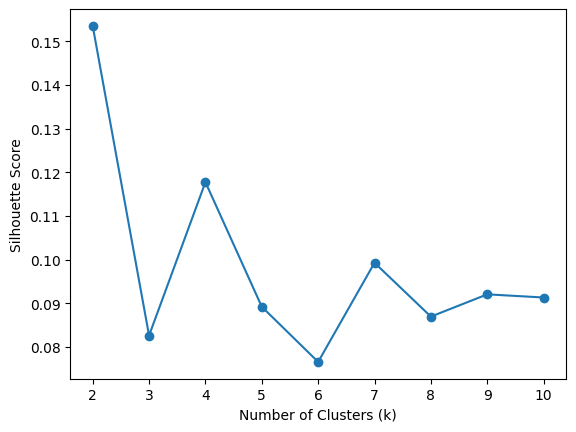

Optimal k: 2
Silhouette Score: 0.15351641583168768


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = kmeans.fit_predict(X_scaled)

print("Optimal k:", optimal_k)
print("Silhouette Score:", max(silhouette_scores))


## Evaluation

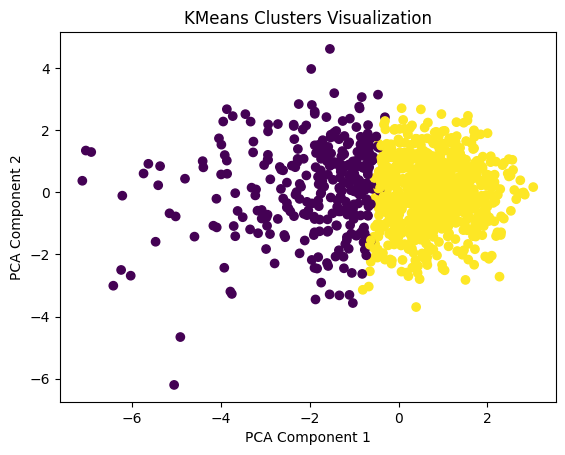

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters Visualization')
plt.show()


Thanks !!!